This Notebook will guide you through the simulation and analysis of near-infrared (NIR) high-resolution spectroscopy (HRS) data of exoplanet atmospheres. 

## Part 1 - The simulator

In this first part we will simulate a typical spectral sequence as observed by the CRIRES spectrograph at the Very Large Telescope. Values and parameters are based on typical performances of the instrument, but they can bee tweaked by the user to veryfy their influence on the final retrieved signals.

In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import simulator_code as sim

To simulate the planet signal we will use a high-resolution spectrum computed for a hot Jupiter like HD 209458 b (1.38 <i>R</i><sub>Jup</sub>, 0.71 <i>M</i><sub>Jup</sub>), orbiting a G0V star in about 3.5 days at 0.045 AU. The modelled thermal emission of this planet includes opacities from CO and H$_2$O, and we will discuss in Part 3 about the various assumptions that were made for the modelling.

In [2]:
wMod = np.load('wmod.npy')
fMod = np.load('fmod.npy')

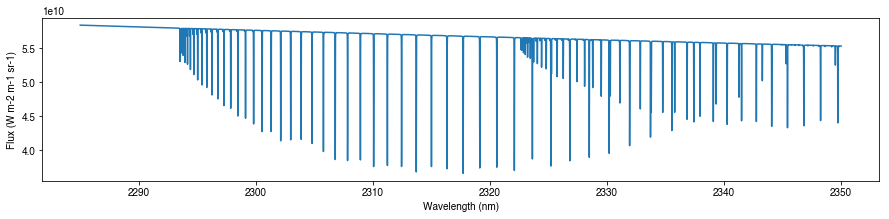

In [3]:
plt.figure(figsize=(15,3))
plt.plot(wMod, fMod)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux (W m-2 m-1 sr-1)')
plt.show()

Since in the majority of exoplanet observations we do not separate the planet light from the host-star light, we want to express the planet spectrum in units of stellar spectrum. We will approximate the star as a black body at temperature <i>T</i><sub>eff</sub> = 6070 K, which is appropriate in the $K$ band except for possible shallow CO stellar lines. The scaling will be:
$$ F_\mathrm{scaled} = \frac{F_\mathrm{model}}{BB(\lambda,T_\mathrm{eff})} \left( \frac{R_P}{R_\star} \right)^2 $$
Our pipeline contains a function that performs the scaling:

In [4]:
fModScaled = sim.scale_model(fMod*np.pi, wMod) * 5

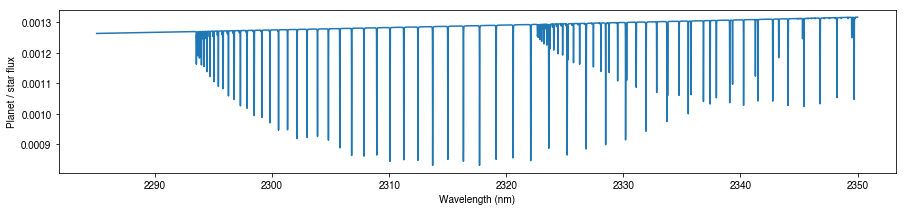

In [5]:
plt.figure(figsize=(15,3))
plt.plot(wMod, fModScaled)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Planet / star flux')
plt.show()

Let's set some of the planet orbital parameters that will be useful for generating the spectral series. Users can experiment with these values to see what happens:

In [6]:
## NOTE: These parameters are for the exoplanet HD 209458 b and they are tuned to real CRIRES observations
## of this object under realistic conditions. The observing block is about 5 hours long
Kp = 145.9               # Planet max. RV (km/s)
air = np.load('air.npy') # Airmass variation (from real observations)
ph = np.load('ph.npy')   # Orbital phases (from real observations)
rvel = np.load('rvel.npy') # Systemic + barycentric radial velocity

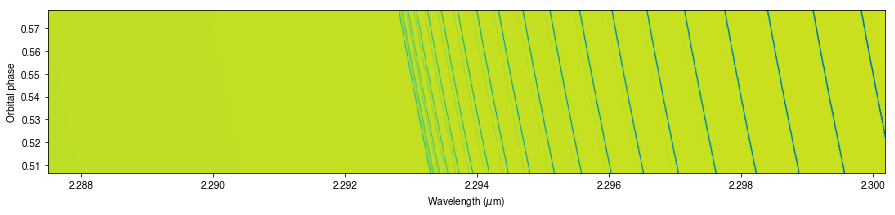

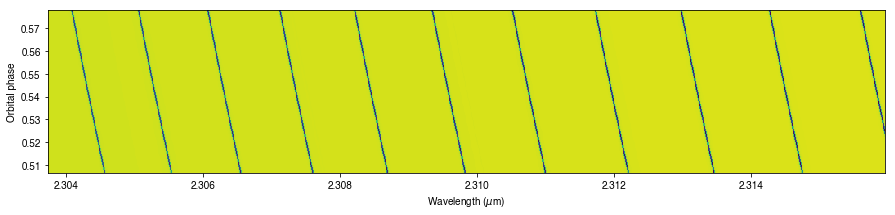

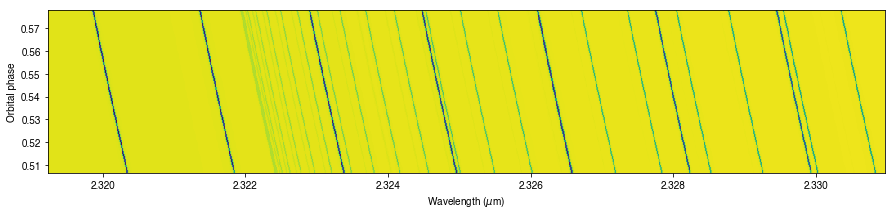

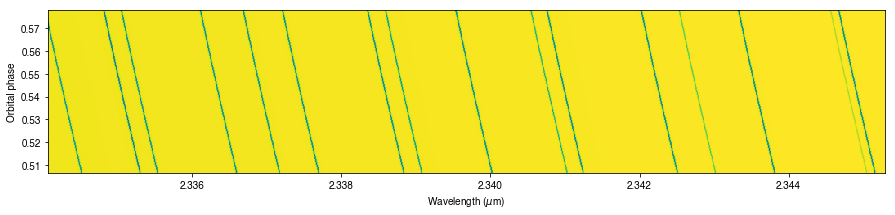

0

In [7]:
wFake, spcFake = sim.create_planet_sequence(wMod, fModScaled, ph, rvel, Kp)
sim.plot_matrix(wFake, spcFake, ph)

(4, 59, 1024)


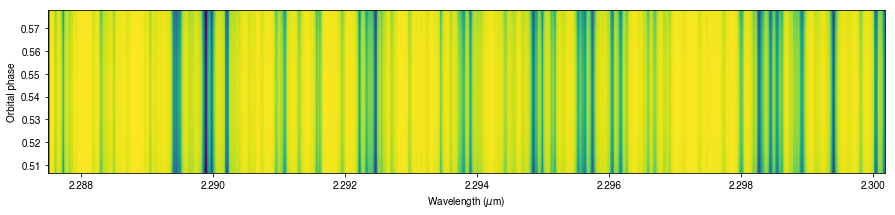

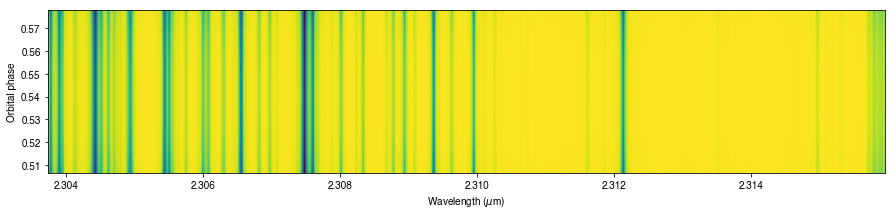

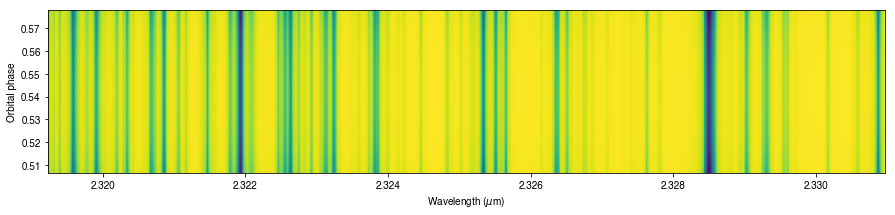

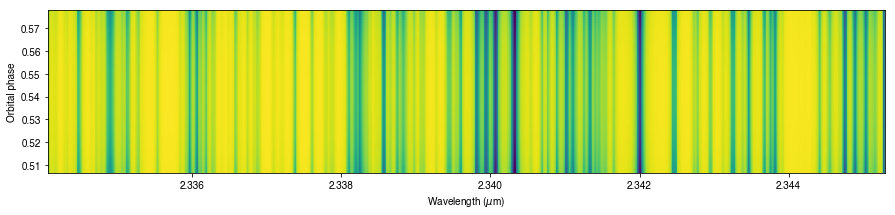

0

In [8]:
# Loading in the modelled telluric spectrum.
tell = np.load('atm_trans.npy')
print(tell.shape)
spcFake *= tell
sim.plot_matrix(wFake, spcFake, ph)

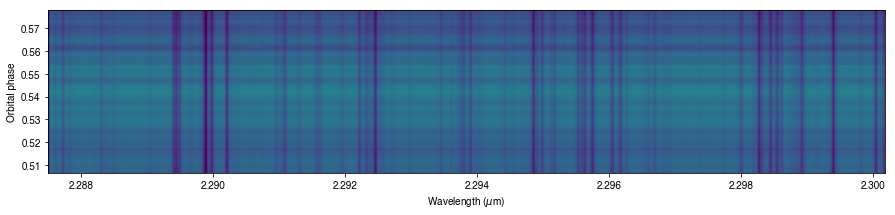

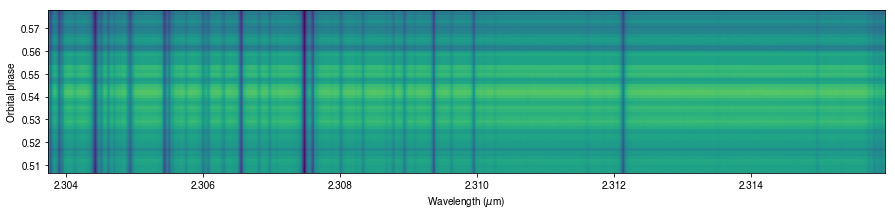

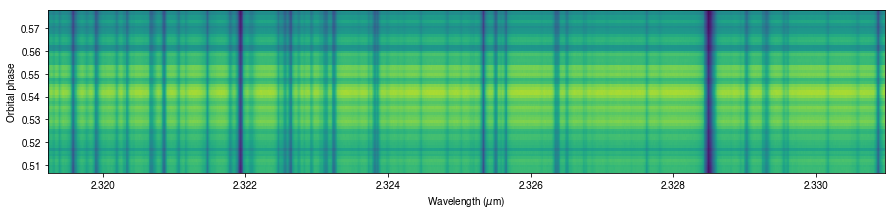

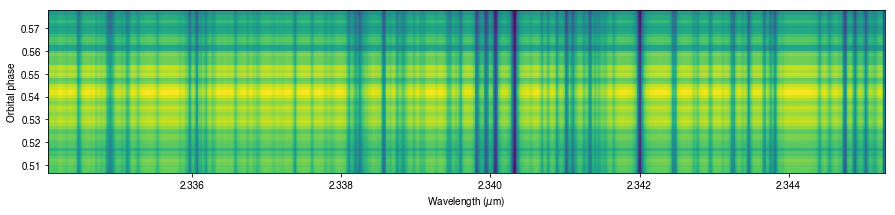

0

In [9]:
spcFake = sim.add_noise(spcFake)
sim.plot_matrix(wFake, spcFake, ph)